# GipsyX processor
### 1. Conversion, analysis and merging  of rinex files into 30 h arc files
### 2. TropNominals generation with VMF1 model
### 3. IONEX merging
### 4. Tree files generation (for each year and IONEX file)

In [1]:
from gxlib import gx_aux,gx_convert, gx_merge, gx_trees, gx_compute, gx_tdps


class rnx2dr:
    def __init__(self,
                 project_name,
                 stations_list,
                 years_list,
                 tree_options,
                 rnx_dir='/mnt/Data/bogdanm/GNSS_data/BIGF_data/daily30s',
                 tmp_dir='/mnt/Data/bogdanm/tmp_GipsyX',
                 VMF1_dir = '/mnt/Data/bogdanm/Products/VMF1_Products',
                 tropNom_type = '30h_tropNominalOut_VMF1.tdp',
                 IGS_logs_dir = '/mnt/Data/bogdanm/GNSS_data/BIGF_data/station_log_files',
                 rate = 300,
                 gnss_products_dir = '/mnt/Data/bogdanm/Products/JPL_GPS_Products_IGb08/Final',
                 ionex_type='igs', #No ionex dir required as ionex merged products will be put into tmp directory by ionex class
                 num_cores = 8):
        
        self.project_name = project_name
        self.IGS_logs_dir = IGS_logs_dir
        self.rnx_dir=rnx_dir
        self.tmp_dir=tmp_dir
        self.stations_list=stations_list
        self.years_list=years_list
        self.num_cores = num_cores
        self.VMF1_dir = VMF1_dir
        self.tropNom_type = tropNom_type
        self.tree_options = tree_options
        self.rnx_files = gx_convert.select_rnx(rnx_dir=self.rnx_dir,stations_list=self.stations_list,years_list=self.years_list)
        self.rnx_files_in_out = gx_convert.rnx2dr_gen_paths(rnx_files=self.rnx_files,stations_list=self.stations_list,tmp_dir=self.tmp_dir)
        self.staDb_path= gx_aux.gen_staDb(self.tmp_dir,self.project_name,self.stations_list,self.IGS_logs_dir)
        self.gnss_products_dir = gnss_products_dir
        self.ionex_type=ionex_type
        self.rate=rate
        
    def analyse(self):
        return gx_aux.analyse(rnx_files=self.rnx_files,stations_list=self.stations_list,years_list=self.years_list)
    def rnx2dr(self):
        gx_convert.rnx2dr(rnx_files=self.rnx_files, stations_list=self.stations_list, tmp_dir=self.tmp_dir, num_cores=self.num_cores)

    def get_drInfo(self):
        gx_aux.get_drinfo(num_cores=self.num_cores,rnx_files_in_out=self.rnx_files_in_out,stations_list=self.stations_list,tmp_dir=self.tmp_dir,years_list=self.years_list)
    
    def dr_merge(self):
        merge_table = gx_merge.get_merge_table(tmp_dir=self.tmp_dir)
        gx_merge.dr_merge(merge_table=merge_table,num_cores=self.num_cores,stations_list=self.stations_list)
    def gen_VMF1_tropNom(self):
        gx_tdps.gen_tropnom(tmp_dir=self.tmp_dir,VMF1_dir=self.VMF1_dir,num_cores=self.num_cores,rate=self.rate,staDb_path=self.staDb_path)
    def gen_trees(self):
        return gx_trees.gen_trees(ionex_type=self.ionex_type,tmp_dir=self.tmp_dir,tree_options=self.tree_options)
    def gd2e(self):
        merge_table = gx_merge.get_merge_table(tmp_dir=self.tmp_dir)
        return gx_compute.gd2e(gnss_products_dir=self.gnss_products_dir,
                merge_tables=merge_table,
                num_cores=self.num_cores,
                project_name=self.project_name,
                staDb_path=self.staDb_path,
                stations_list=self.stations_list,
                tmp_dir=self.tmp_dir,
                trees_df=self.gen_trees(),
                tropNom_type=self.tropNom_type,
                years_list=self.years_list)
            



In [2]:
from trees_options import *

In [11]:
'''CAMB test dataset 2003-2007 processing for noise analysis etc'''
stations_list=['CAMB',]
# years_list=[2003,]
years_list=[2003,2004,2005,2006,2007]
camb_aux = rnx2dr(stations_list=stations_list,years_list=years_list, project_name='camb_2003-2007_kinematic057_10Em5',num_cores=16,tree_options=all_on_kinematic_057_10Em5)
camb_aux.gd2e()

Station CAMB is already processed


array([None], dtype=object)

In [12]:
camb_aux = rnx2dr(stations_list=stations_list,years_list=years_list, project_name='camb_2003-2007_kinematic057_10Em4',num_cores=16,tree_options=all_on_kinematic_057_10Em4)
camb_aux.gd2e()

Station CAMB is already processed


array([None], dtype=object)

In [13]:
camb_aux = rnx2dr(stations_list=stations_list,years_list=years_list, project_name='camb_2003-2007_kinematic057_10Em3',num_cores=16,tree_options=all_on_kinematic_057_10Em3)
camb_aux.gd2e()

Station CAMB is already processed


array([None], dtype=object)

In [14]:
camb_aux = rnx2dr(stations_list=stations_list,years_list=years_list, project_name='camb_2003-2007_kinematic057_10Em2',num_cores=16,tree_options=all_on_kinematic_057_10Em2)
camb_aux.gd2e()

Station CAMB is already processed


array([None], dtype=object)

In [15]:
camb_aux = rnx2dr(stations_list=stations_list,years_list=years_list, project_name='camb_2003-2007_kinematic057_10Em1',num_cores=16,tree_options=all_on_kinematic_057_10Em1)
camb_aux.gd2e()

Station CAMB is already processed


array([None], dtype=object)

In [16]:
camb_aux = rnx2dr(stations_list=stations_list,years_list=years_list, project_name='camb_2003-2007_kinematic057_10E0',num_cores=16,tree_options=all_on_kinematic_057_10E0)
camb_aux.gd2e()

Station CAMB is already processed


array([None], dtype=object)

In [17]:
camb_aux = rnx2dr(stations_list=stations_list,years_list=years_list, project_name='camb_2003-2007_kinematic057_10E1',num_cores=16,tree_options=all_on_kinematic_057_10E1)
camb_aux.gd2e()

Station CAMB is already processed


array([None], dtype=object)

In [18]:
camb_aux = rnx2dr(stations_list=stations_list,years_list=years_list, project_name='camb_2003-2007_kinematic057_10E2',num_cores=16,tree_options=all_on_kinematic_057_10E2)
camb_aux.gd2e()

Station CAMB is already processed


array([None], dtype=object)

In [16]:
def RMS_res(residuals):
    '''Expects np array from finalResiduals.out with no header. Returns RMS of IonoFreeL_1P_2P [included] (Carrier phase residulas rms)'''
    residuals_header = ['Time','T/R Antenna No','DataType','PF Residual (m)','Elevation from receiver (deg)',\
                    ' Azimuth from receiver (deg)','Elevation from transmitter (deg)',' Azimuth from transmitter (deg)','Status']
    residuals_df = _pd.DataFrame(data = residuals,columns=residuals_header).set_index(['DataType','Time'])
    L_residuals = residuals_df[residuals_df['Status'].isna()].loc['IonoFreeL_1P_2P']['PF Residual (m)']
    RMS = (((L_residuals**2).sum())/L_residuals.count())**0.5
    return L_residuals

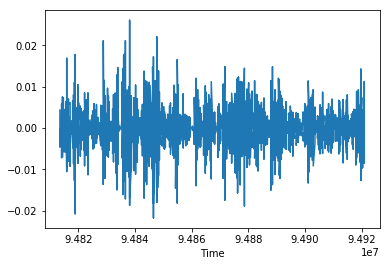

In [21]:
RMS_res(npz_file['finalResiduals']).plot()
plt.show()

In [1]:
'''Processing Graph'''
# camb_aux.rnx2dr()
# camb_aux.get_drInfo()
# camb_aux.gen_VMF1_tropNom()
# camb_aux.dr_merge()
'''Add IONEX merger here'''
# camb_aux.gd2e()

'Add IONEX merger here'

In [55]:
file = '/home/bogdanm/Desktop/test/Summary'

In [84]:
pd.read_csv(file,skiprows=[0,1,2,3,4,7,10,11,12,13],header=None,delim_whitespace=True).set_index([1,2])

0         3         4         5     6  7      8  9
1               2                                                             
IonoFreeC_1P_2P included  --- -0.503520 -2.479113 -2.466010  2397  (  99.5%  )
                deleted   ---  2.929923  3.035164 -3.589551    13  (   0.5%  )
IonoFreeL_1P_2P included  ---  0.004775  0.026111 -0.021730  2378  (  98.7%  )
                deleted   ---  0.174309  0.309614 -0.669919    32  (   1.3%  )

In [87]:
test_rms = pd.read_fwf(file, colspecs=[[6,21],[24,34],[37,50],[53,66],[69,82],[88,103]], skiprows=[0,1,2,3,7,10,11,12,13,14]).set_index(['DataType','Status'])
# test_rms

In [99]:
test_rms

RMS (m)   Max (m)   Min (m)       number (%)
DataType        Status                                                 
IonoFreeC_1P_2P included -0.503520 -2.479113 -2.466010  2397 (  99.5% )
                deleted   2.929923  3.035164 -3.589551    13 (   0.5% )
IonoFreeL_1P_2P included  0.004775  0.026111 -0.021730  2378 (  98.7% )
                deleted   0.174309  0.309614 -0.669919    32 (   1.3% )